In [1]:
from pathlib import Path
import sys
sys.path.insert(0, str(Path.cwd().parent))
import tektronix
from tektronix.appconfig import AppConfig; config=AppConfig(Path.cwd().parent/'config.ini')
import tektronix.tektronix
from tektronix.tektronix import http; comm=http("192.168.10.4")
from IPython.display import Image, display
from importlib import reload
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib notebook

In [2]:
reload(tektronix.tektronix)
from tektronix.tektronix import http; comm=http("192.168.10.4")

In [3]:
def freq_response(how_many=10):
    cols = ('amp_in', 'amp_out', 'phase', 'freq')
    data = pd.DataFrame(columns=cols, dtype=float, index=range(how_many))
    
    for ii in range(how_many):
        
        input("Set the frequency and hit enter.")
        
        # do a statistical reset
        comm.converse('MEASUrement:STATIstics:MODE OFF')
        time.sleep(1.0)
        comm.converse('MEASUrement:STATIstics:MODE MEANSTD')
        img=comm.get_raw_image()
        idisplay=Image(data=img, height=20, width=200)
        display(idisplay)
        time.sleep(5.0)
        amp_in=float(comm.converse('measurement:meas1:value?'))
        amp_out=float(comm.converse('measurement:meas2:value?'))
        phase=float(comm.converse('measurement:meas3:value?'))
        freq=float(comm.converse('measurement:meas4:value?'))
        
        data.iloc[ii]={'amp_in':float(amp_in), 
                     'amp_out':float(amp_out), 
                     'phase':float(phase), 
                     'freq':float(freq)}
                    

        print(data.iloc[ii])
        
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    mag = pd.DataFrame({'magnitude':list(20*np.log10(data['amp_out']/data['amp_in']))}, index=data['freq'])
    phase = pd.DataFrame({'phase':list(data['phase']) }, index=data['freq'])
    return data, mag, phase

Set the frequency and hit enter.


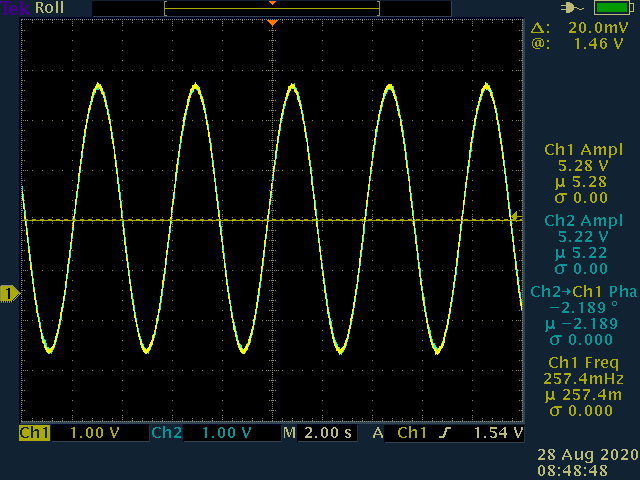

amp_in     5.28000
amp_out    5.22000
phase     -1.39160
freq       0.25793
Name: 0, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


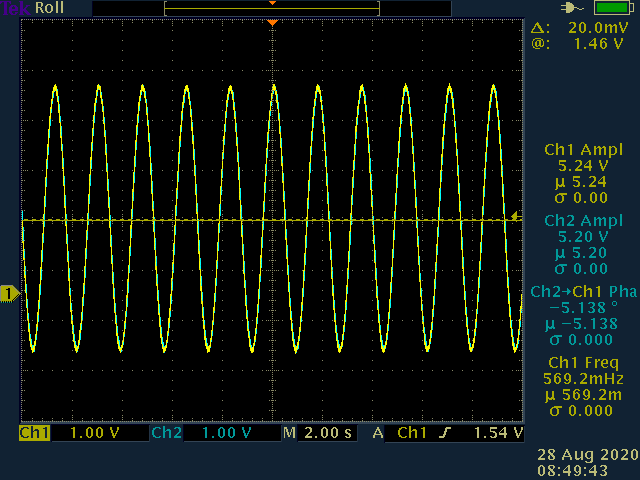

amp_in     5.2400
amp_out    5.1800
phase     -5.1751
freq       0.5685
Name: 1, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


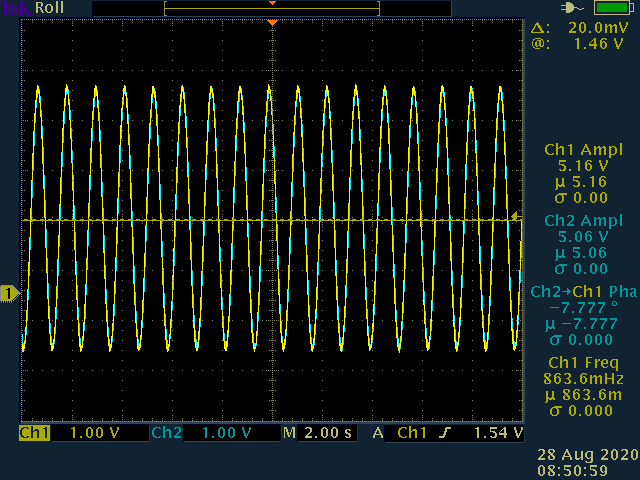

amp_in     5.36000
amp_out    5.26000
phase     -7.49130
freq       0.86655
Name: 2, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


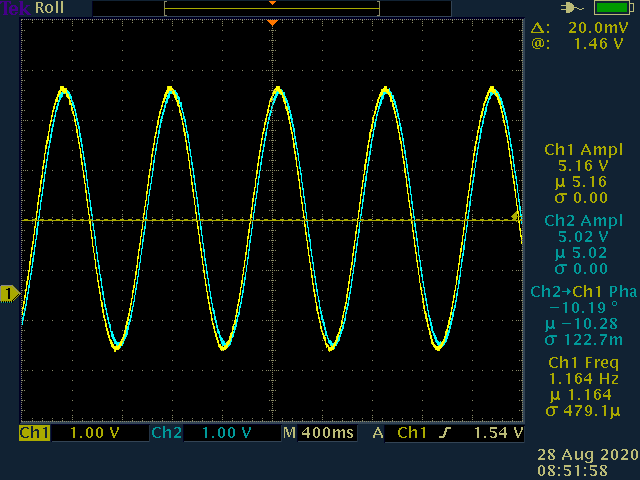

amp_in     5.1600
amp_out    5.0200
phase     -8.4780
freq       1.1639
Name: 3, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


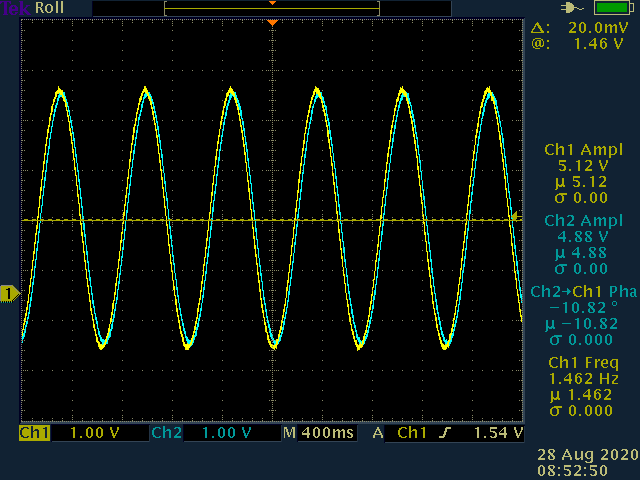

amp_in      5.1200
amp_out     4.9000
phase     -11.1380
freq        1.4552
Name: 4, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


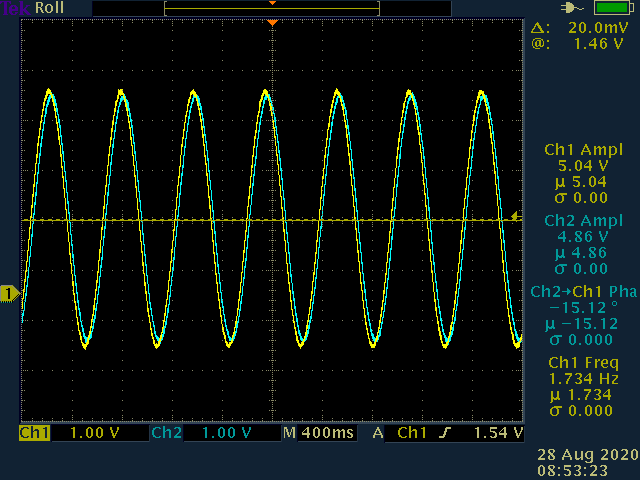

amp_in      5.0400
amp_out     4.8800
phase     -13.1340
freq        1.7369
Name: 5, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


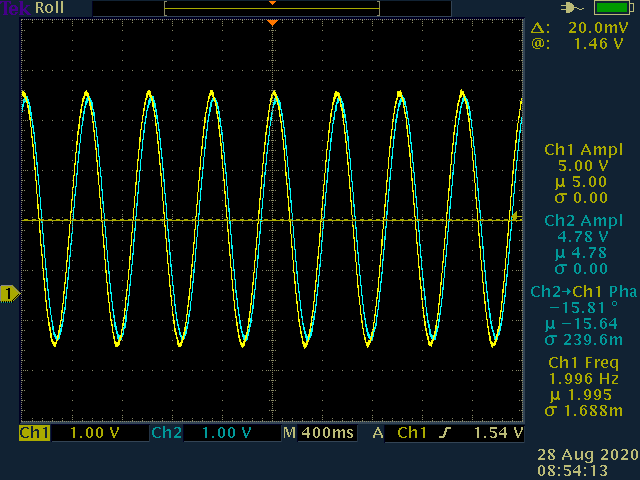

amp_in      5.0200
amp_out     4.7800
phase     -15.2940
freq        1.9893
Name: 6, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


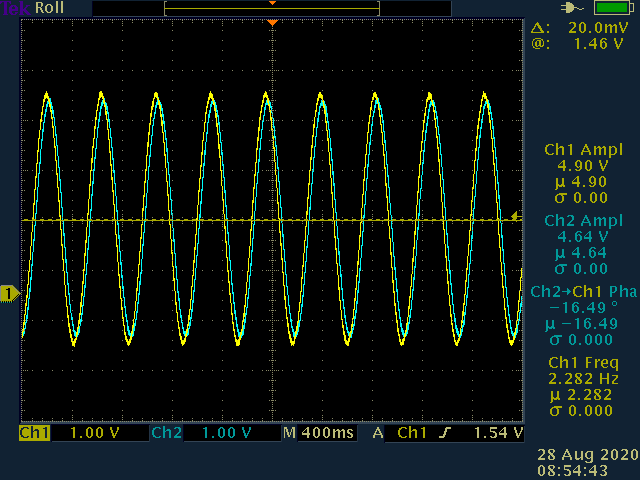

amp_in      4.9000
amp_out     4.6600
phase     -16.5360
freq        2.2841
Name: 7, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


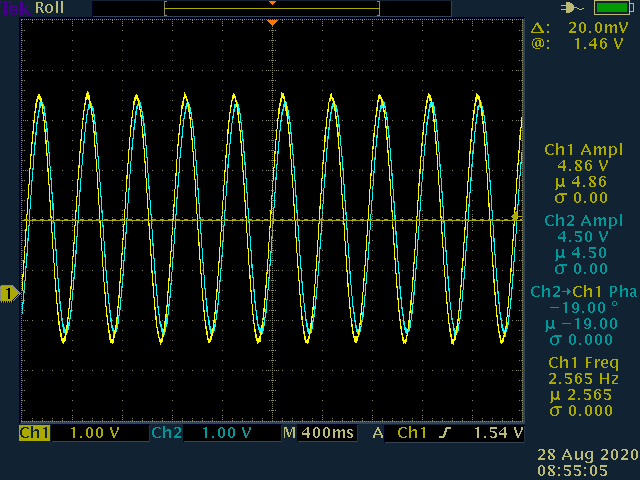

amp_in      4.8600
amp_out     4.5000
phase     -19.0040
freq        2.5641
Name: 8, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


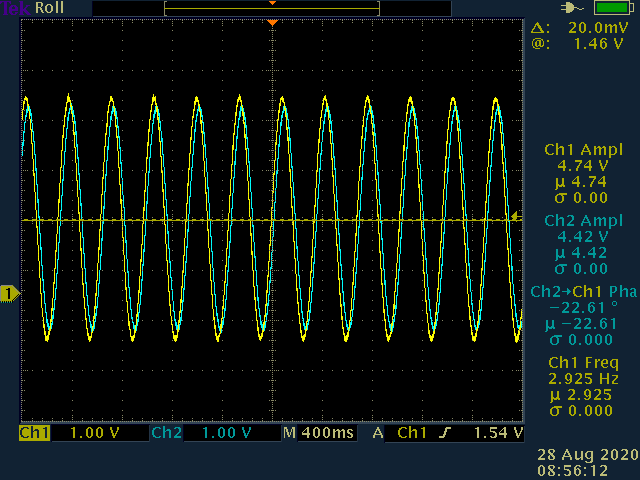

amp_in      4.700
amp_out     4.440
phase     -23.059
freq        2.930
Name: 9, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


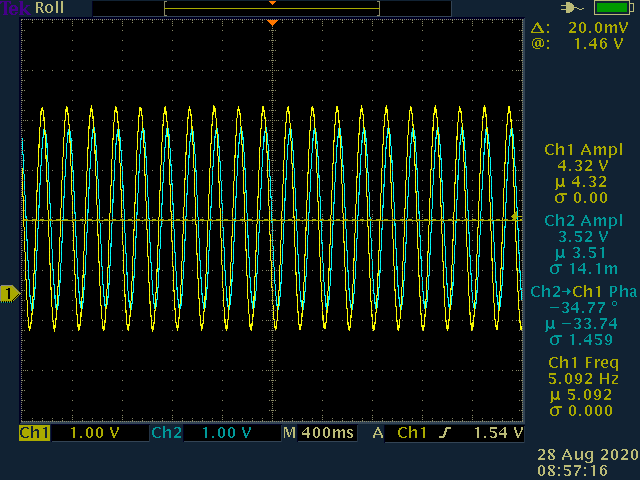

amp_in      4.3400
amp_out     3.5200
phase     -33.5790
freq        5.0908
Name: 10, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


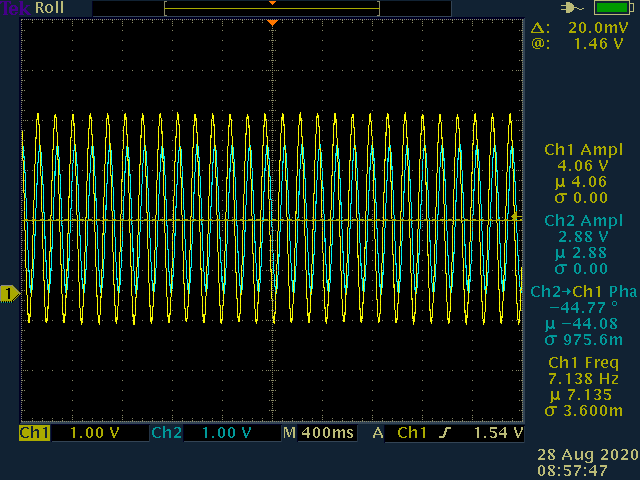

amp_in      4.0600
amp_out     2.8600
phase     -45.1720
freq        7.1429
Name: 11, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


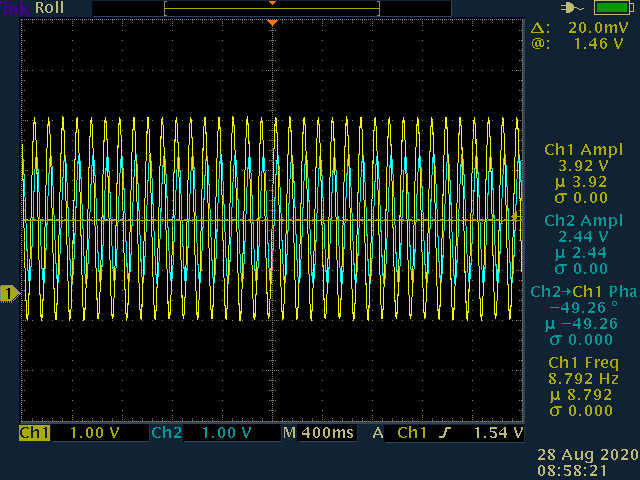

amp_in      3.9200
amp_out     2.4400
phase     -49.5950
freq        8.8106
Name: 12, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


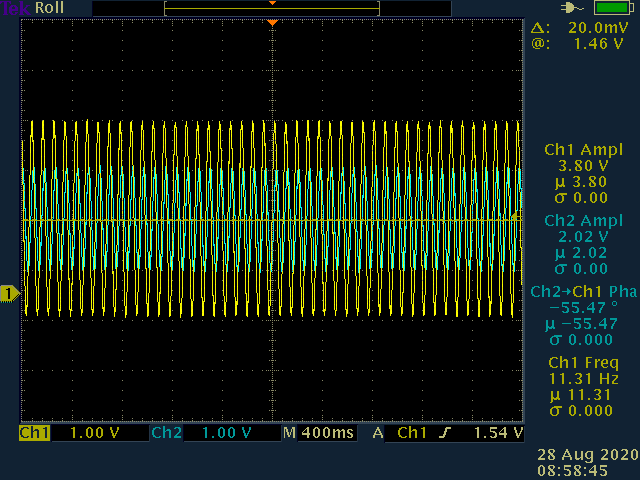

amp_in      3.820
amp_out     2.020
phase     -54.591
freq       11.293
Name: 13, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


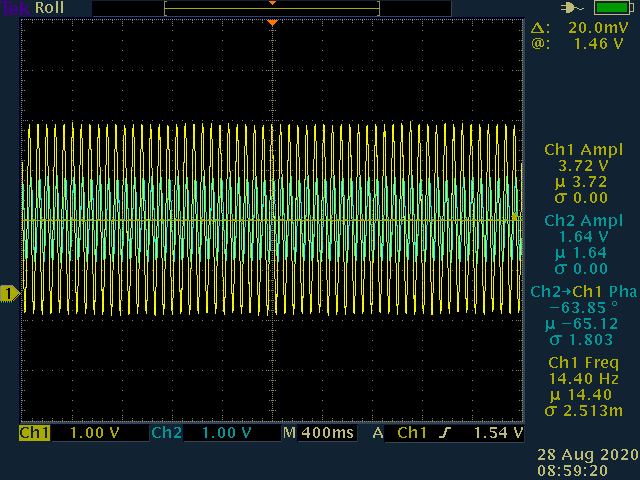

amp_in      3.720
amp_out     1.620
phase     -63.489
freq       14.528
Name: 14, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


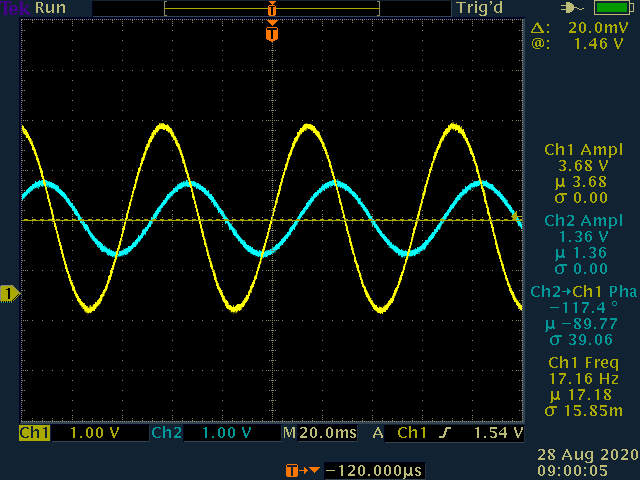

amp_in      3.620
amp_out     1.360
phase     -63.669
freq       17.131
Name: 15, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


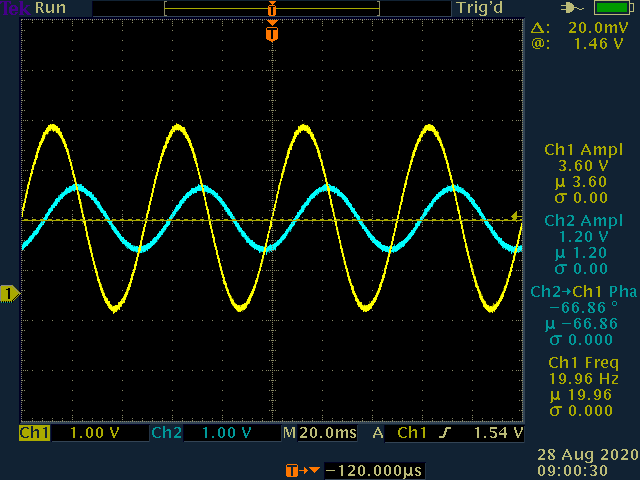

amp_in      3.620
amp_out     1.220
phase     -68.526
freq       19.889
Name: 16, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


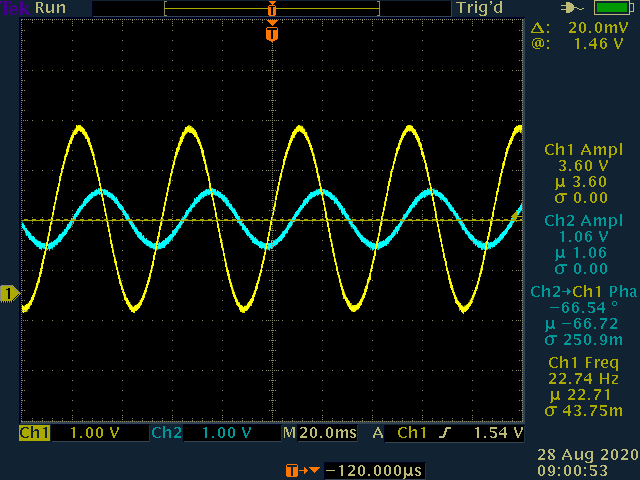

amp_in      3.600
amp_out     1.060
phase     -71.095
freq       22.836
Name: 17, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


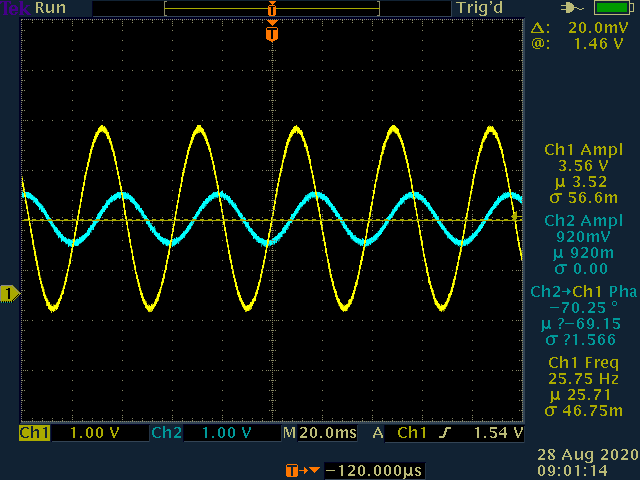

amp_in      3.520
amp_out     0.920
phase     -66.012
freq       25.671
Name: 18, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set the frequency and hit enter.


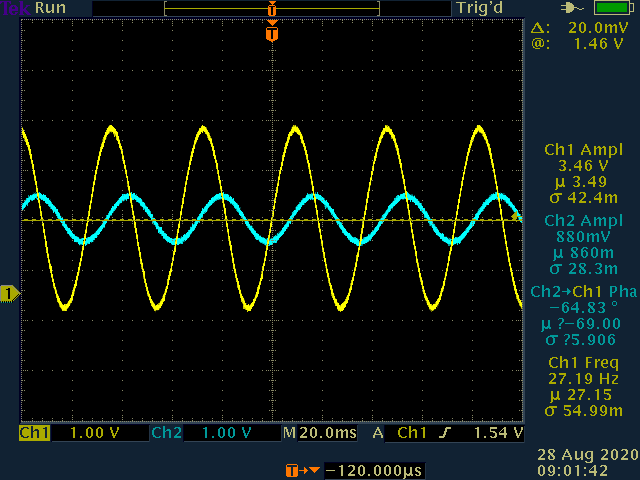

amp_in       3.480
amp_out      0.880
phase     -134.060
freq        27.119
Name: 19, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [4]:
data, mag, phase=freq_response(20)

In [5]:
data

,amp_in,amp_out,phase,freq
0,5.28,5.22,-1.3916,0.25793
1,5.24,5.18,-5.1751,0.56850
2,5.36,5.26,-7.4913,0.86655
3,5.16,5.02,-8.4780,1.16390
4,5.12,4.90,-11.1380,1.45520
5,5.04,4.88,-13.1340,1.73690
6,5.02,4.78,-15.2940,1.98930
7,4.90,4.66,-16.5360,2.28410
8,4.86,4.50,-19.0040,2.56410
9,4.70,4.44,-23.0590,2.93000


<IPython.core.display.Javascript object>


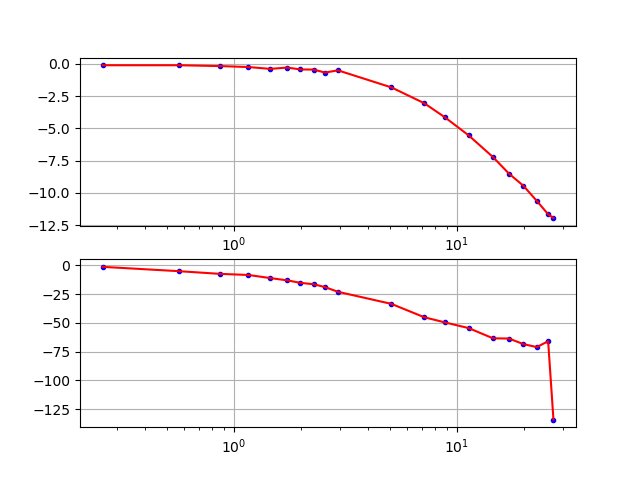

In [6]:
fig = plt.gcf()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.semilogx(mag, 'b.')
ax1.semilogx(mag, 'r-')
ax2.semilogx(phase, 'b.')
ax2.semilogx(phase, 'r-')
ax1.grid()
ax2.grid()
plt.show()